In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import tensorflow as tf
import keras

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
X = housing.data
y = housing.target

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
y_train

array([1.431, 0.708, 1.08 , ..., 2.53 , 1.5  , 1.585])

In [9]:
X_train.shape

(11610, 8)

In [10]:
#Api funcional
inputs = keras.Input((8,))
hidden1 = keras.layers.Dense(30, activation="relu")(inputs)
outputs = keras.layers.Dense(1)(hidden1)
model = keras.models.Model(inputs=[inputs], outputs=[outputs])

In [11]:
# Api subclase
class RegCalifornia(keras.models.Model):
    def __init__(self,shape=X_train.shape[1:], **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(30, activation="relu")
        self.outputs = keras.layers.Dense(1)


    def call(self, inputs):
        h1 = self.hidden1(inputs)
        outputs = self.outputs(h1)
        return outputs

In [12]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(8,)),
    # keras.layers.Dense(30, activation="relu", input_shape=(8,)),
    keras.layers.Dense(30, activation="relu", name="Activation_layer"),
    keras.layers.Dense(1, name="Output_layer")
], name="modelito")
model.compile(optimizer= keras.optimizers.SGD(learning_rate=0.001),
              loss="mean_squared_error")

model.summary()

Model: "modelito"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Activation_layer (Dense)        │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.keras", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10000,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8500 - val_loss: 1.0025
Epoch 2/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9148 - val_loss: 0.8045
Epoch 3/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7811 - val_loss: 0.7482
Epoch 4/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7299 - val_loss: 0.7052
Epoch 5/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6907 - val_loss: 0.6695
Epoch 6/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6584 - val_loss: 0.6391
Epoch 7/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6308 - val_loss: 0.6135
Epoch 8/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6074 - val_loss: 0.5911
Epoch 9/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5875 - val_loss: 0.5723
Epoch 10/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5709 - val_loss: 0.5561
Epoch 11/10000
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5567 - val_loss: 0.5422
Epoch 12/10000
363/

In [14]:
history.history["loss"]

[2.0501420497894287,
 0.8397325277328491,
 0.7408866882324219,
 0.6940593719482422,
 0.6573376655578613,
 0.6268030405044556,
 0.6007121801376343,
 0.5785885453224182,
 0.5598815083503723,
 0.544056236743927,
 0.5306870937347412,
 0.5194090008735657,
 0.5098521113395691,
 0.5016854405403137,
 0.4947471618652344,
 0.48890188336372375,
 0.4839125871658325,
 0.4795832931995392,
 0.4758329689502716,
 0.47256216406822205,
 0.46963369846343994,
 0.46700072288513184,
 0.4645691514015198,
 0.46232110261917114,
 0.4602140486240387,
 0.45824113488197327,
 0.4563668370246887,
 0.4545576572418213,
 0.45282697677612305,
 0.45117446780204773,
 0.4495824873447418,
 0.4480511248111725,
 0.44656461477279663,
 0.4451341927051544,
 0.4437750279903412,
 0.44247445464134216,
 0.4412166476249695,
 0.43998610973358154,
 0.43879222869873047,
 0.43763652443885803,
 0.43651118874549866,
 0.43540993332862854,
 0.4343356490135193,
 0.4332730174064636,
 0.4322095215320587,
 0.43115702271461487,
 0.4300872087478637

<Axes: >

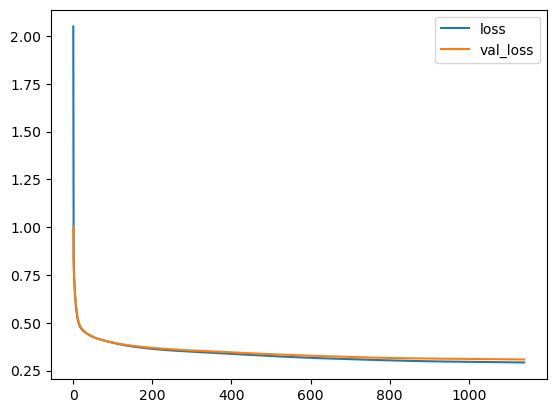

In [15]:
df = pd.DataFrame(history.history)
df.plot()

In [16]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.3081


0.32077696919441223

In [17]:
X_nueva = X_test[:3]
y_nueva = model.predict(X_nueva)
y_nueva

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0.8875113 ],
       [1.509506  ],
       [0.40314513]], dtype=float32)

In [18]:
model.save("model/modelito.keras")
# keras.models.load_model("model/modelito.keras")

In [19]:
#TensorBoard
root_logdir = os.path.join(".", "archives/logs")
#root_logdir = "./my_logs"

checkpoint_cb = keras.callbacks.ModelCheckpoint("model/my_keras_model.keras", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3000 - val_loss: 0.3084
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3000 - val_loss: 0.3084
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2999 - val_loss: 0.3084
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2999 - val_loss: 0.3084
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2999 - val_loss: 0.3084
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2999 - val_loss: 0.3084
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2999 - val_loss: 0.3083
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2998 - val_loss: 0.3083
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2998 - val_loss: 0.3083
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2998 - val_loss: 0.3083
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2998 - val_loss: 0.3083
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [20]:
"""
tensorboard --logdir = ./my_logs --port= 6006
"""

%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 22068), started 0:37:19 ago. (Use '!kill 22068' to kill it.)